# **Sign Language MNIST**

**RUBEN DARIO FIERRO SUAREZ**

Dataset de lenguage de señales (Lenguaje de señas americano)

El dataseset consta de imagenes de lenguaje de señas, de resolucion 28x28 pixeles. EL dataset ya viene construido en formato CSV de tal manera que las filas representan a una imagen o una muestra, de manera que se tiene como entrada datos de 785 caracteristicas, donde 784 representan a cada pixel de la imagen y 1 que representa la salida o la letra de la seña que representa la imagen.

Los datos son de tipo numerico:

*   Entrada (pixeles): en escala de grises (0 - 255)
*   Salida (clasificacion): representan el numero que le corresponde a cada letra del alfabeto (exeptuando el 9-J y 25-Z) Ej:

* 0 --> A
* 1 --> B
* 2 --> C

La J (9) y la Z(25) no se encuentran en este dataset debido a que son señas que representan un movimiento especifico de la mano, por lo tanto no se tienen en cuenta para este proyecto.




# **LIBRERIAS A UTILIZAR**

In [56]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd      #Para uso de dataframes
import numpy as np       #Para uso de calculos de matrices
import matplotlib.pyplot as plt    #Para uso de graficos
import cv2                         #Para uso de imagenes en codigo
from sklearn.decomposition import PCA   #Algoritmo de PCA para reducir dimensiones de imagenes
import seaborn as sns                   #Para uso de graficos especiales
from sklearn.model_selection import train_test_split   #Liberia para separacion de datos para el entrenamiento y validacion
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# **VERIFICAR QUE SE ESTA USANDO GPU**

In [57]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# **VISUALIZACION DEL LENGUAJE DE SEÑAS**

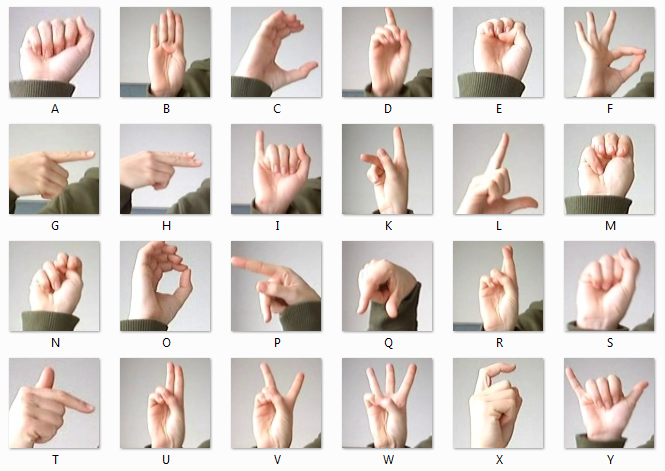

In [4]:
#Ruta donde me encuentro en el notebook
!pwd

/content


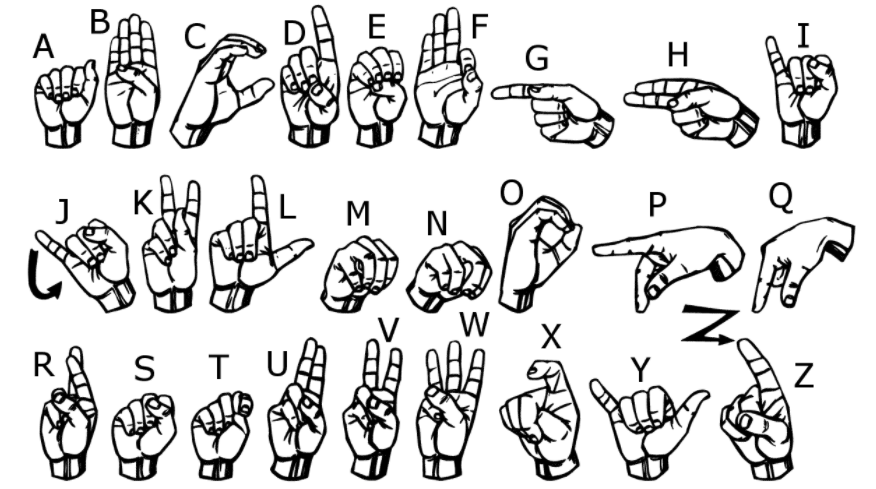

**COMO SE OBSERVA, LAS LETRAS J y Z SON MOVIMIENTOS, POR LO TANTO NO SE TIENEN MUESTRAS DE ESTAS EN LOS DATASET.**

# **VISUALIZACION Y ANALISIS DEL DATASET**

**DATASET DE ENTRENAMIENTO**

In [5]:
dataset_train = pd.read_csv('sign_mnist_train.csv')    #Se carga y guarda el dataset de entrenamiento
dataset_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


**DATASET DE: 27.455 FILAS x 785 COLUMNAS**

In [6]:
dataset_train.describe()   #Verificamos las estadisticas de los datos del dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,165.533673,166.685522,167.811983,168.495647,169.310872,169.956948,170.460463,170.716518,170.872701,170.808887,170.481442,169.979749,169.264506,168.144127,166.936660,165.765944,163.620725,161.933600,161.349117,147.146858,150.284502,152.941978,155.415043,158.068986,160.229576,162.345802,164.291167,165.736332,166.991732,168.503187,...,131.949918,134.583755,139.361974,148.115862,155.095465,160.346858,163.915607,165.364414,165.911273,165.182080,164.407977,163.488254,143.407758,144.189474,145.711637,147.660718,149.019414,148.670843,148.185212,147.298926,146.286323,144.027062,142.966017,139.769550,137.071572,135.277181,131.922783,130.232235,132.046367,135.289237,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,31.279244,30.558445,29.771007,29.329251,28.620248,27.961255,27.053544,26.763535,26.307419,26.088459,26.475963,26.940885,27.871515,29.368386,30.906718,31.902723,34.303747,35.991306,36.571064,41.555429,40.094304,39.427215,38.686176,37.242459,36.373576,35.242915,33.899171,32.759395,31.656140,30.833853,...,57.586028,60.373218,63.301768,63.300608,63.511566,62.551522,61.833119,62.210750,62.163516,61.958245,61.950177,62.403709,54.406116,53.658786,54.710497,54.613724,54.351761,55.233710,55.904715,57.155523,57.965677,57.393379,56.689603,56.118823,54.680900,55.278778,56.384076,58.111783,59.204300,62.553694,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,23.000000,28.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [7]:
dataset_train.info()    #Verificamos la informacion del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


**ASIGNACION DE LOS NUMEROS DE LAS LETRAS A SU RESPECTIVO SIGNIFICADO, PARA PODER VISUALIZAR MAS ADELANTE.**

* 0 --> A
* 1 --> B

In [8]:
y_abc = dataset_train['label'].values  # Variable que despues se convertira su salida numerica a su respectiva letra

In [9]:
# --------------------------- LISTA QUE CONTIENE LAS LETRAS DEL LENGUAJE DE SEÑAS  ---------------
letras = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

letras2 = []                #Lista vacia que luego se ira llenando con la asignacion de numeros a letras de la salida (y_abc)

a = pd.factorize(letras)    #Con la funcion factorize se obtiene la tupla de cada letra con su respectivo numero
print('Tupla: ', a, '\n')

# -------------------  CICLO QUE IRA ALMACENANDO EN LA LISTA letras2 EL SIGNIFICADO DE CADA NUMERO DE LA SALIDA y_abc -----------------
for j in range(len(y_abc)):
  for i in range(len(letras)):
    if y_abc[j] == a[0][i]:
      b = a[1][i]
      letras2.append(b)
print('Salida en letras: ', letras2[0:15])
print('Salida en numeros:', np.transpose(y_abc)[0:15])

Tupla:  (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25]), array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)) 

Salida en letras:  ['D', 'G', 'C', 'C', 'N', 'Q', 'I', 'W', 'D', 'D', 'S', 'K', 'Q', 'W', 'U']
Salida en numeros: [ 3  6  2  2 13 16  8 22  3  3 18 10 16 22 20]


**VISUALIZACION DE COMO ESTA BALANCEADO LAS MUESTRAS DEL DATASET**

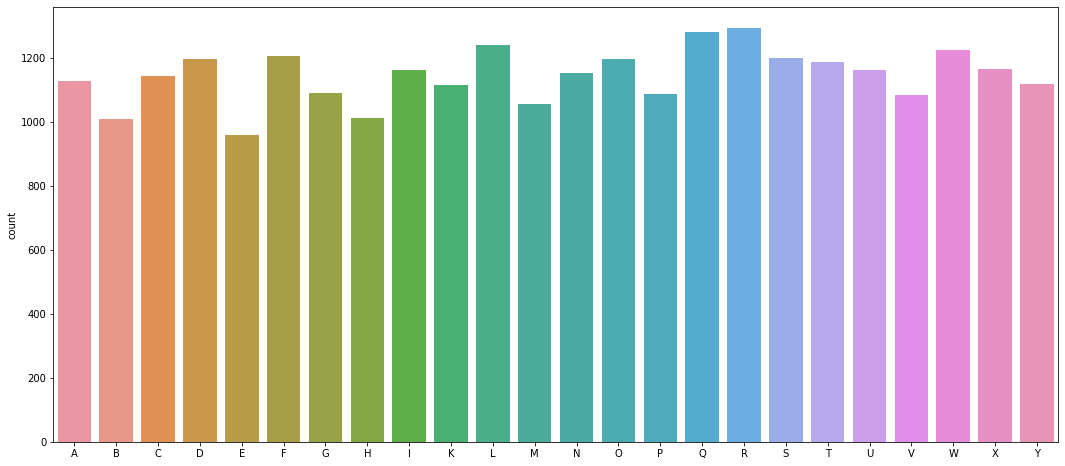

In [10]:
letras2_org = letras2.copy()      #Copio la variable para que esta no se vea afectada mas adelante
letras2_org.sort()                #Organizo la variable de menor a mayor para que se visualize mejor en el grafico
plt.figure(figsize = (18, 8))
sns.countplot(x = letras2_org)

Se observa que el dataset esta bien balanceado con cada respectiva clase (letras), no hay una variacion muy grande entre el numero de muestras de cada clase.

**VISUALIZACION DE IMAGENES DEL DATASET (PRIMERAS 15 MUESTRAS)**

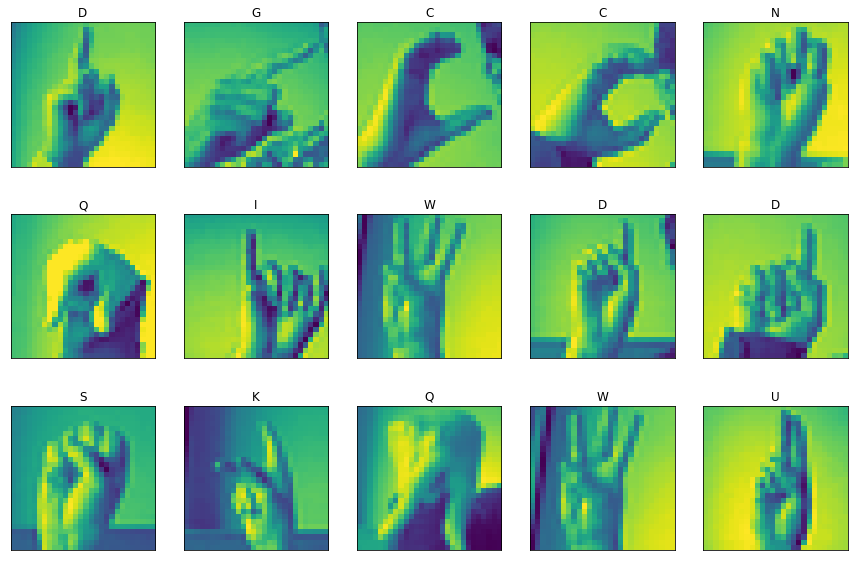

In [11]:
lista1 = []
fig = plt.figure(0, (15,10))                                  #Defino el tamaño de las graficas de las imagenes
data_para_imagenes = dataset_train.iloc[:,1:].values          #Matriz que contiene solo los pixeles sin la salida 'label'

for i in range (0,15):                                        #Ciclo que ira graficando las primeras 15 imagenes
  imagen1 = data_para_imagenes[i:i+1,:].reshape((28,28))      #cada muestra de la matriz ahora se convierte en una muestra de 28x28
  lista1.append(imagen1)
  ax = fig.add_subplot(3,5,i+1)                               #Matriz de 3x5, ira graficando en cada posicion la imagen
  ax.imshow(lista1[i])                                         #Se grafica la imagen
  ax.set_title(letras2[i])                                    #Se asigna el titulo de la imagen que corresponde a su letra
  ax.set_xticks([])                                           #Se elimina el eje X
  ax.set_yticks([])                                           #Se elimina el eje Y

**DATASET DE VALIDACION (TEST)**

In [12]:
dataset_test = pd.read_csv('sign_mnist_test.csv')     #Se carga y guarda el dataset de validacion (test)
dataset_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


**DATASET DE 7.172 FILAS x 785 COLUMNAS**

In [13]:
dataset_test.describe()       #Verificamos la informacion del dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.00000,7172.000000,7172.000000,7172.000000,7172.00000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,167.311350,168.670106,169.535555,170.325851,170.983408,171.912995,172.547546,173.024679,173.047407,173.061071,172.892917,172.721138,172.757808,172.464724,171.486336,170.335053,167.807864,166.130508,166.005298,149.299219,152.244562,155.137758,157.410904,159.926380,162.644032,163.941578,165.429030,167.522030,169.134551,170.018265,...,130.122142,131.117122,137.610569,144.693391,152.420524,158.126185,162.592443,164.434049,163.607501,162.289320,160.726018,158.914250,140.333519,141.578221,144.378555,146.717234,148.785694,149.922058,150.090073,150.996096,149.320413,144.85527,143.642917,139.861266,134.860987,132.53932,130.001115,127.021194,127.619074,130.056191,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,32.361682,30.908526,29.798987,29.443487,29.428899,28.187431,27.153368,26.655256,26.241347,26.175239,26.432681,26.472974,25.966731,25.864503,26.901053,27.857983,32.352186,35.222495,34.997471,43.778760,42.125128,40.656730,39.562860,37.761727,36.259743,36.512048,36.118684,34.011801,32.365020,31.275976,...,54.654038,60.071544,62.733051,64.028074,64.554236,64.492854,63.649858,63.092645,63.650868,63.577437,64.835263,65.976015,56.224514,55.376292,55.941713,54.230365,55.368538,54.532359,55.625739,56.806818,55.737844,55.58762,55.700026,54.368151,53.685764,52.43773,54.613953,56.146581,58.540949,61.338999,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,30.000000,35.000000,4.000000,0.000000,2.000000,25.000000,26.000000,32.000000,37.000000,7.000000,0.000000,16.000000,36.000000,35.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,9.000000,13.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

**DIMENSIONES DE LOS DATASETS**

In [14]:
#----------------------------- DIMENSIONES DE LOS DATASETS ----------------------------
print('Train Dataset: ', dataset_train.shape)
print('Test Dataset: ', dataset_test.shape)

Train Dataset:  (27455, 785)
Test Dataset:  (7172, 785)


#**ASIGNACION DE LAS VARIABLES X y Y DE ENTRENAMIENTO Y DE VALIDACION (TEST)**

In [15]:
#-------------------------------ASIGNACION DE LOS DATOS: ENTRENAMIENTO Y VALIDACION TEST ----------------
# ENTRENAMIENTO
X = dataset_train.iloc[:,1:].values
Y = dataset_train.iloc[:,0].values

# VALIDACION Y TEST
X_test = dataset_test.iloc[:,1:].values
Y_test = dataset_test.iloc[:,0].values

#**DATOS ESCALADOS CON StandardScaler Y USANDO PCA**

X.shape: (27455, 784)
X_pca_standarscaled: (27455, 100) 

X_test.shape: (7172, 784)
X_test_pca_standarscaled.shape: (7172, 100)


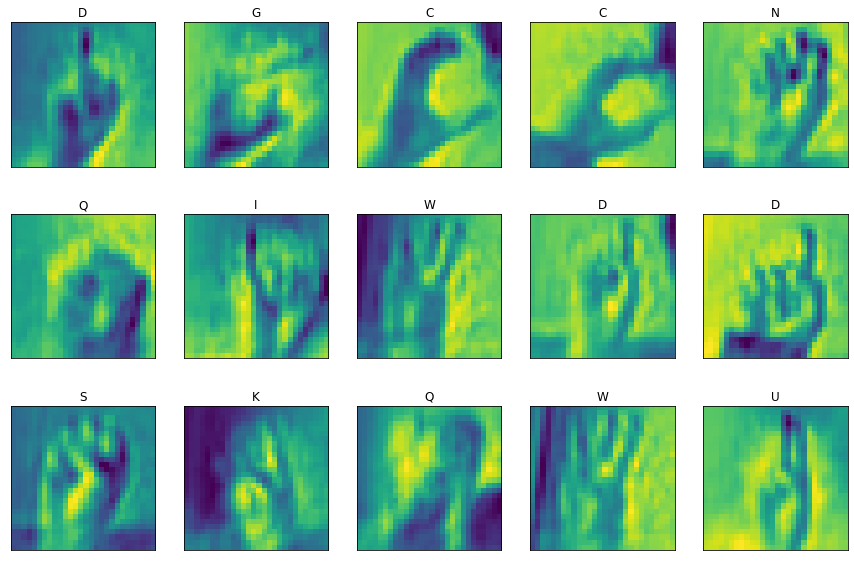

In [16]:
#----------------------------------- STANDARD SCALER -------------------
standard_scaler = StandardScaler()
standard_scaler.fit(X)

X_standarscaled = standard_scaler.transform(X)

X_test_standarscaled = standard_scaler.transform(X_test)

#---------------------------- Calculo de PCA a los datos de entrenamiento con 100 componentes principales

pca_standarscaled = PCA(n_components=100, whiten=True, random_state=0).fit(X_standarscaled)       #PCA con las primeras 100 componentes
X_pca_standarscaled = pca_standarscaled.transform(X_standarscaled)                                   
X_test_pca_standarscaled = pca_standarscaled.transform(X_test_standarscaled)

print("X.shape: {}".format(X.shape))
print("X_pca_standarscaled: {}".format(X_pca_standarscaled.shape), '\n')

print("X_test.shape: {}".format(X_test.shape))
print("X_test_pca_standarscaled.shape: {}".format(X_test_pca_standarscaled.shape))

#------------------------------- VISUALIZACION DE LAS IMAGENES CON EL PREPROSESAMIENTO
x_inv = pca_standarscaled.inverse_transform(X_pca_standarscaled)

lista2 = []
fig = plt.figure(0, (15,10))         #Defino el tamaño de las graficas de las imagenes

for i in range (0,15):               #Ciclo que ira graficando las primeras 9 imagenes
  imagen2 = x_inv[i:i+1,:].reshape((28,28))        
  lista2.append(imagen2)
  ax = fig.add_subplot(3,5,i+1)      #Matriz de 3x3, ira graficando en cada posicion la imagen
  ax.imshow(lista2[i])               #Se grafica la imagen
  ax.set_title(letras2[i])           #Se asigna el titulo de la imagen que corresponde a su letra
  ax.set_xticks([])                  #Se elimina el eje X
  ax.set_yticks([])                  #Se elimina el eje Y

#**DATOS ESCALADOS CON MinMaxScaler Y USANDO PCA**

X.shape: (27455, 784)
X_pca_minmaxscaled: (27455, 100) 

X_test.shape: (7172, 784)
X_test_pca_minmaxscaled.shape: (7172, 100)


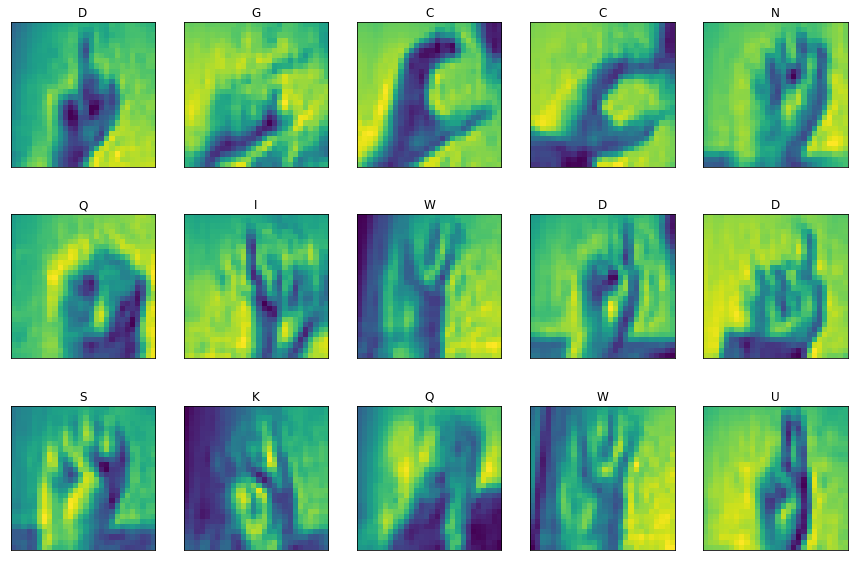

In [17]:
#----------------------------------- MINMAX SCALER -------------------
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X)

X_minmaxscaled= minmax_scaler.transform(X)

X_test_minmaxscaled = minmax_scaler.transform(X_test)

#---------------------------- Calculo de PCA a los datos de entrenamiento con 100  componentes principales

pca_minmaxscaled = PCA(n_components=100, whiten=True, random_state=0).fit(X_minmaxscaled)       #PCA con las primeras 100 componentes
X_pca_minmaxscaled = pca_minmaxscaled.transform(X_minmaxscaled)                                   
X_test_pca_minmaxscaled = pca_minmaxscaled.transform(X_test_minmaxscaled)

print("X.shape: {}".format(X.shape))
print("X_pca_minmaxscaled: {}".format(X_pca_minmaxscaled.shape), '\n')

print("X_test.shape: {}".format(X_test.shape))
print("X_test_pca_minmaxscaled.shape: {}".format(X_test_pca_minmaxscaled.shape))

#------------------------------- VISUALIZACION DE LAS IMAGENES CON EL PREPROSESAMIENTO
x_inv = pca_minmaxscaled.inverse_transform(X_pca_minmaxscaled)

lista3 = []
fig = plt.figure(0, (15,10))         #Defino el tamaño de las graficas de las imagenes

for i in range (0,15):               #Ciclo que ira graficando las primeras 9 imagenes
  imagen3 = x_inv[i:i+1,:].reshape((28,28))        
  lista3.append(imagen3)
  ax = fig.add_subplot(3,5,i+1)      #Matriz de 3x3, ira graficando en cada posicion la imagen
  ax.imshow(lista3[i])               #Se grafica la imagen
  ax.set_title(letras2[i])           #Se asigna el titulo de la imagen que corresponde a su letra
  ax.set_xticks([])                  #Se elimina el eje X
  ax.set_yticks([])                  #Se elimina el eje Y

In [18]:
print('X_standarscaled.min:', X_standarscaled.min())
print('X_standarscaled.max:', X_standarscaled.max(), '\n')

print('X_minmaxscaled.min:', X_minmaxscaled.min())
print('X_minmaxscaled.max:', X_minmaxscaled.max())

X_standarscaled.min: -6.439219832943478
X_standarscaled.max: 3.2271988396627265 

X_minmaxscaled.min: 0.0
X_minmaxscaled.max: 1.0


#**SEPARACION DE DATOS: ENTRENAMIENTO - VALIDACION - VALIDACION (TEST)**

In [19]:
#------------------------------- STANDARD SCALER ----------------------------------------
#------------------------------- SEPARACION DE LOS DATOS: ENTRENAMIENTO Y VALIDACION ----------------

X_train_standardscaled, X_val_standardscaled, Y_train_standardscaled, Y_val_standardscaled = train_test_split(X_pca_standarscaled, Y, test_size= 0.25, random_state = 0)      #separacion de datos de entrenamiento y validacion, 
                                                                                                #con 25% para datos de validacion
print('Dimension X_train_standardscaled: ', X_train_standardscaled.shape, '\n')
print('Dimension Y_train: ', Y_train_standardscaled.shape, '\n')
print('Dimension X_val_standardscaled: ', X_val_standardscaled.shape, '\n')
print('Dimension Y_val: ', Y_val_standardscaled.shape, '\n')

Dimension X_train_standardscaled:  (20591, 100) 

Dimension Y_train:  (20591,) 

Dimension X_val_standardscaled:  (6864, 100) 

Dimension Y_val:  (6864,) 



In [20]:
#------------------------------- MINMAX SCALER -----------------------------------
#------------------------------- SEPARACION DE LOS DATOS: ENTRENAMIENTO Y VALIDACION ----------------

X_train_minmaxscaler, X_val_minmaxscaler, Y_train_minmaxscaler, Y_val_minmaxscaler = train_test_split(X_pca_minmaxscaled, Y, test_size= 0.25, random_state = 0)      #separacion de datos de entrenamiento y validacion, 
                                                                                                #con 25% para datos de validacion
print('Dimension X_train_minmaxscaler: ', X_train_minmaxscaler.shape, '\n')
print('Dimension Y_train: ', Y_train_minmaxscaler.shape, '\n')
print('Dimension X_val_minmaxscaler: ', X_val_minmaxscaler.shape, '\n')
print('Dimension Y_val: ', Y_val_minmaxscaler.shape, '\n')

Dimension X_train_minmaxscaler:  (20591, 100) 

Dimension Y_train:  (20591,) 

Dimension X_val_minmaxscaler:  (6864, 100) 

Dimension Y_val:  (6864,) 



# **REGRESION LOGISTICA -  STANDAR SCALER**

10 -9 -8 -7 -6 -5 -4 -3 -2 -1 -

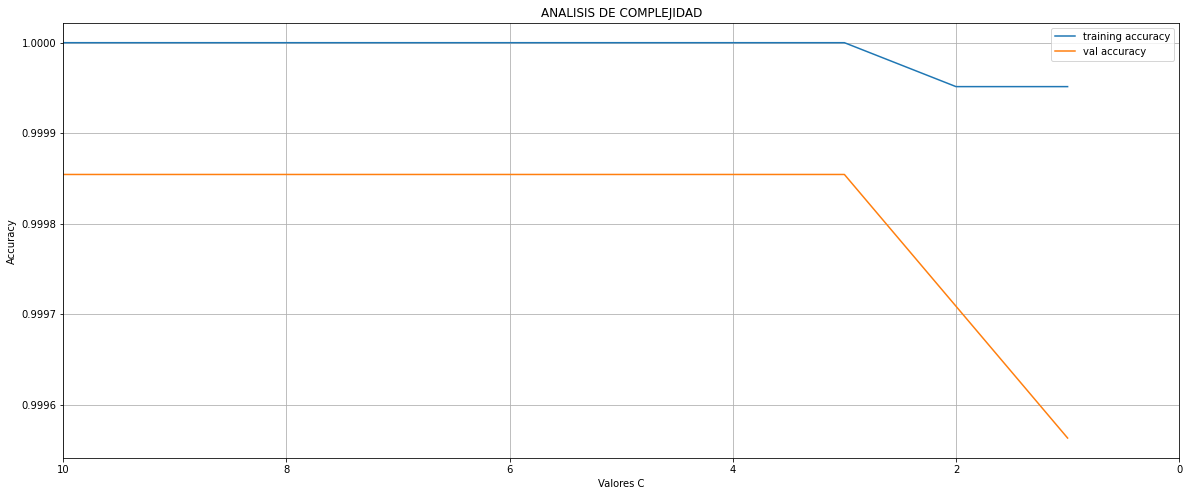

In [21]:
training_accuracy1 = []                    #Lista para guardar los datos de la precision con los datos de entrenamiento
val_accuracy1 = []                         #Lista para guardar los datos de la precision con los datos de validacion

valor_c1 =range(10 , 0, -1)                     #Creamos un vector descendente que contiene va de C=10 a C=0

for i in valor_c1:                                                      #Ciclo FOR para realizar el entrenamiento y validacion desde C=10 a C=0
    logreg = LogisticRegression(C=i, max_iter=500)                                             #Creamos un objeto que contiene al modelo de regresion
    logreg.fit(X_train_standardscaled, Y_train_standardscaled)                                 #Entrenamos el modelo con los datos de entrenamiento
    training_accuracy1.append(logreg.score(X_train_standardscaled, Y_train_standardscaled))    #Medimos y guardamos el desempeño del modelo con los datos de entrenamiento
    val_accuracy1.append(logreg.score(X_val_standardscaled, Y_val_standardscaled))             #Medimos y guardamos el desempeño del modelo con los datos de validacion
    print(i, '-', end='')
# GRAFICAMOS LOS DESEMPEÑOS OBTENIDOS VS LOS VALORES DE C
plt.figure(figsize=(20, 8))
plt.plot(valor_c1, training_accuracy1, label="training accuracy")
plt.plot(valor_c1, val_accuracy1, label="val accuracy")
plt.title("ANALISIS DE COMPLEJIDAD")
plt.ylabel("Accuracy")
plt.xlabel("Valores C")
plt.xlim(10, 0)
plt.grid()
plt.legend()

0.01 -0.060000000000000005 -0.11 -0.16000000000000003 -0.21000000000000002 -0.26 -0.31000000000000005 -0.36000000000000004 -0.41000000000000003 -0.46 -0.51 -0.56 -0.6100000000000001 -0.66 -0.7100000000000001 -0.76 -0.81 -0.8600000000000001 -0.91 -0.9600000000000001 -

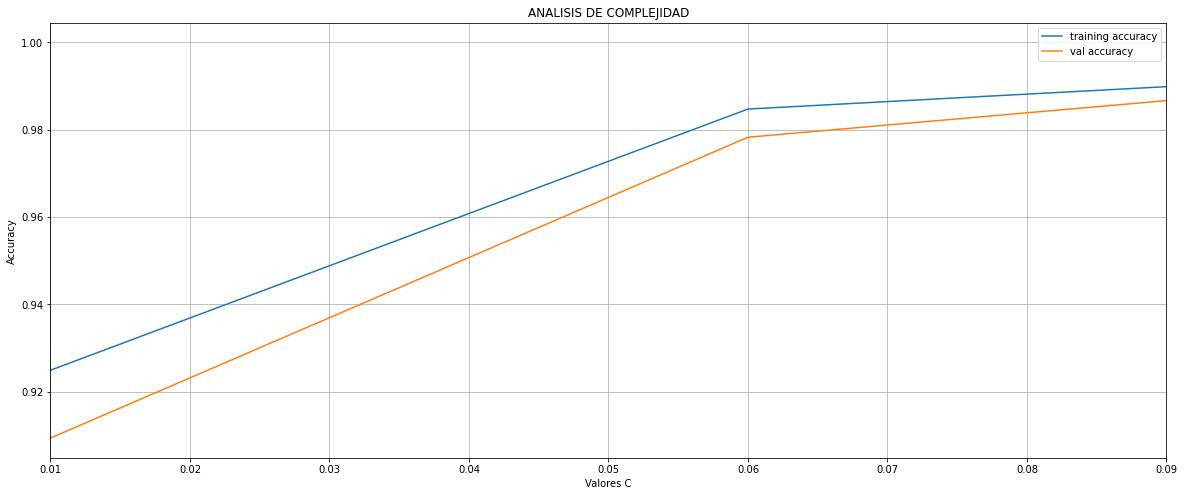

In [22]:
training_accuracy2 = []                    #Lista para guardar los datos de la precision con los datos de entrenamiento
val_accuracy2 = []                         #Lista para guardar los datos de la precision con los datos de validacion

valor_c2 =np.arange(0.01, 1, 0.05)                    #Creamos un vector descendente que contiene va de C=0.01 a c=1

for i in valor_c2:                                                      #Ciclo FOR para realizar el entrenamiento y validacion desde c=10 a c=0
    logreg = LogisticRegression(C=i, max_iter=500)                                             #Creamos un objeto que contiene al modelo de regresion
    logreg.fit(X_train_standardscaled, Y_train_standardscaled)                                 #Entrenamos el modelo con los datos de entrenamiento
    training_accuracy2.append(logreg.score(X_train_standardscaled, Y_train_standardscaled))    #Medimos y guardamos el desempeño del modelo con los datos de entrenamiento
    val_accuracy2.append(logreg.score(X_val_standardscaled, Y_val_standardscaled))             #Medimos y guardamos el desempeño del modelo con los datos de validacion
    print(i, '-', end='')
# GRAFICAMOS LOS DESEMPEÑOS OBTENIDOS VS LOS VALORES DE C
plt.figure(figsize=(20, 8))
plt.plot(valor_c2, training_accuracy2, label="training accuracy")
plt.plot(valor_c2, val_accuracy2, label="val accuracy")
plt.title("ANALISIS DE COMPLEJIDAD")
plt.ylabel("Accuracy")
plt.xlabel("Valores C")
plt.xlim(0.01, 0.09)
plt.grid()
plt.legend()

In [23]:
#CON UN C = 4 EL DESEMPEÑO ES EL MEJOR EN VALIDACION
logreg = LogisticRegression(C=4, max_iter=500)  
logreg.fit(X_train_standardscaled, Y_train_standardscaled)
print('Desempeño de entrenamiento: ', logreg.score(X_train_standardscaled, Y_train_standardscaled))
print('Desempeño de validacion: ', logreg.score(X_val_standardscaled, Y_val_standardscaled))
print('Desempeño de TEST: ', logreg.score(X_test_pca_standarscaled, Y_test), '\n')

print('Diferencia de los desempeños: ', abs(logreg.score(X_train_standardscaled, Y_train_standardscaled) 
            - logreg.score(X_val_standardscaled, Y_val_standardscaled)))

print('Diferencia de los desempeños: ', abs(logreg.score(X_train_standardscaled, Y_train_standardscaled) 
            - logreg.score(X_test_pca_standarscaled, Y_test)))

Desempeño de entrenamiento:  1.0
Desempeño de validacion:  0.9998543123543123
Desempeño de TEST:  0.6162855549358617 

Diferencia de los desempeños:  0.00014568764568767545
Diferencia de los desempeños:  0.3837144450641383


#**REGRESION LOGISTICA - MINMAX SCALER**

10 -9 -8 -7 -6 -5 -4 -3 -2 -1 -

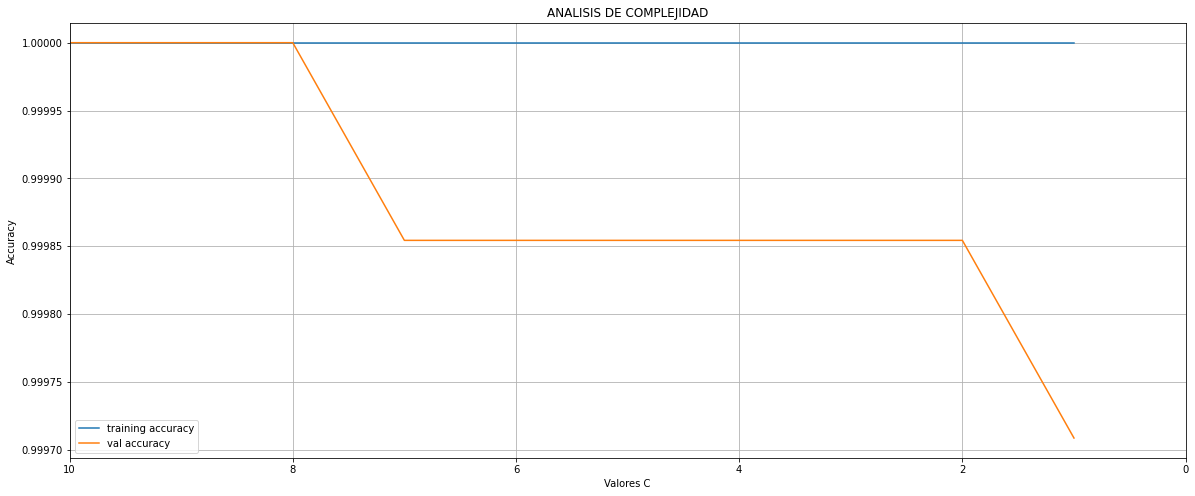

In [24]:
training_accuracy3 = []                    #Lista para guardar los datos de la precision con los datos de entrenamiento
val_accuracy3 = []                         #Lista para guardar los datos de la precision con los datos de validacion

valor_c3 =range(10 , 0, -1)                     #Creamos un vector descendente que contiene va de c=10 a c=1

for i in valor_c3:                                                      #Ciclo FOR para realizar el entrenamiento y validacion desde c=10 a c=0
    logreg = LogisticRegression(C=i, max_iter=500)                                             #Creamos un objeto que contiene al modelo de regresion
    logreg.fit(X_train_minmaxscaler, Y_train_minmaxscaler)                                     #Entrenamos el modelo con los datos de entrenamiento
    training_accuracy3.append(logreg.score(X_train_minmaxscaler, Y_train_minmaxscaler))        #Medimos y guardamos el desempeño del modelo con los datos de entrenamiento
    val_accuracy3.append(logreg.score(X_val_minmaxscaler, Y_val_minmaxscaler))                 #Medimos y guardamos el desempeño del modelo con los datos de validacion
    print(i, '-', end='')
# GRAFICAMOS LOS DESEMPEÑOS OBTENIDOS VS LOS VALORES DE C
plt.figure(figsize=(20, 8))
plt.plot(valor_c3, training_accuracy3, label="training accuracy")
plt.plot(valor_c3, val_accuracy3, label="val accuracy")
plt.title("ANALISIS DE COMPLEJIDAD")
plt.ylabel("Accuracy")
plt.xlabel("Valores C")
plt.xlim(10, 0)
plt.grid()
plt.legend()

0.01 -0.060000000000000005 -0.11 -0.16000000000000003 -0.21000000000000002 -0.26 -0.31000000000000005 -0.36000000000000004 -0.41000000000000003 -0.46 -0.51 -0.56 -0.6100000000000001 -0.66 -0.7100000000000001 -0.76 -0.81 -0.8600000000000001 -0.91 -0.9600000000000001 -

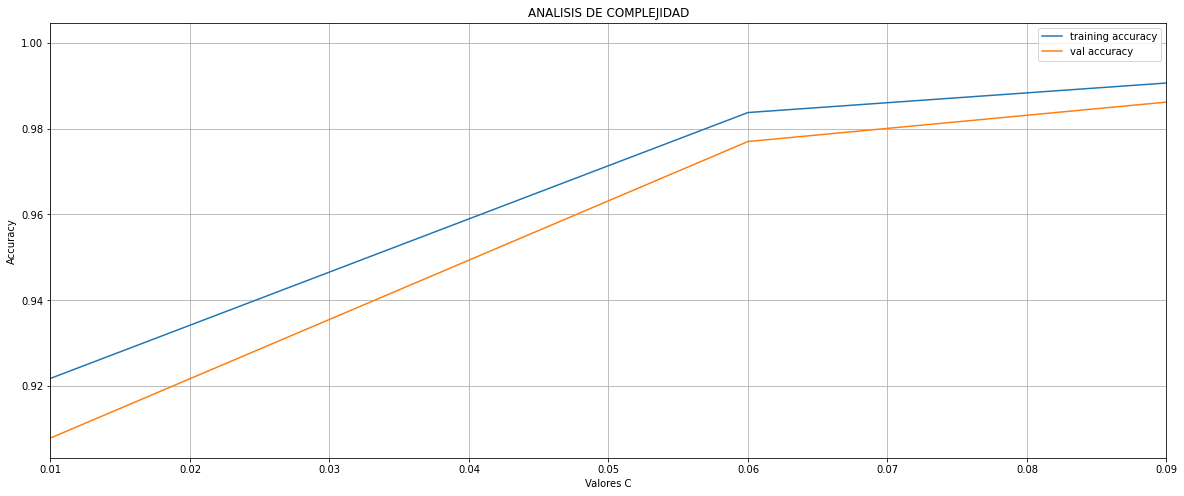

In [25]:
training_accuracy4 = []                    #Lista para guardar los datos de la precision con los datos de entrenamiento
val_accuracy4 = []                         #Lista para guardar los datos de la precision con los datos de validacion

valor_c4 =np.arange(0.01, 1, 0.05)                    #Creamos un vector descendente que contiene va de C=0.01 a C=1

for i in valor_c4:                                                      #Ciclo FOR para realizar el entrenamiento y validacion desde C=0.01 a C=1
    logreg = LogisticRegression(C=i, max_iter=500)                                             #Creamos un objeto que contiene al modelo de regresion
    logreg.fit(X_train_minmaxscaler, Y_train_minmaxscaler)                                     #Entrenamos el modelo con los datos de entrenamiento
    training_accuracy4.append(logreg.score(X_train_minmaxscaler, Y_train_minmaxscaler))        #Medimos y guardamos el desempeño del modelo con los datos de entrenamiento
    val_accuracy4.append(logreg.score(X_val_minmaxscaler, Y_val_minmaxscaler))                 #Medimos y guardamos el desempeño del modelo con los datos de validacion
    print(i, '-', end='')
# GRAFICAMOS LOS DESEMPEÑOS OBTENIDOS VS LOS VALORES DE C
plt.figure(figsize=(20, 8))
plt.plot(valor_c4, training_accuracy4, label="training accuracy")
plt.plot(valor_c4, val_accuracy4, label="val accuracy")
plt.title("ANALISIS DE COMPLEJIDAD")
plt.ylabel("Accuracy")
plt.xlabel("Valores C")
plt.xlim(0.01, 0.09)
plt.grid()
plt.legend()

In [26]:
#CON UN C = 8 EL DESEMPEÑO ES EL MEJOR EN VALIDACION
logreg = LogisticRegression(C=8, max_iter=500)  
logreg.fit(X_train_minmaxscaler, Y_train_minmaxscaler)
print('Desempeño de entrenamiento: ', logreg.score(X_train_minmaxscaler, Y_train_minmaxscaler))
print('Desempeño de validacion: ', logreg.score(X_val_minmaxscaler, Y_val_minmaxscaler))
print('Desempeño de TEST: ', logreg.score(X_test_pca_minmaxscaled, Y_test), '\n')

print('Diferencia de los desempeños: ', abs(logreg.score(X_train_minmaxscaler, Y_train_minmaxscaler) 
            - logreg.score(X_val_minmaxscaler, Y_val_minmaxscaler)))

print('Diferencia de los desempeños: ', abs(logreg.score(X_train_minmaxscaler, Y_train_minmaxscaler) 
            - logreg.score(X_test_pca_minmaxscaled, Y_test)))

Desempeño de entrenamiento:  1.0
Desempeño de validacion:  1.0
Desempeño de TEST:  0.5992749581706637 

Diferencia de los desempeños:  0.0
Diferencia de los desempeños:  0.4007250418293363


#**RANDOM FOREST - STANDAR SCALER**

20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 -

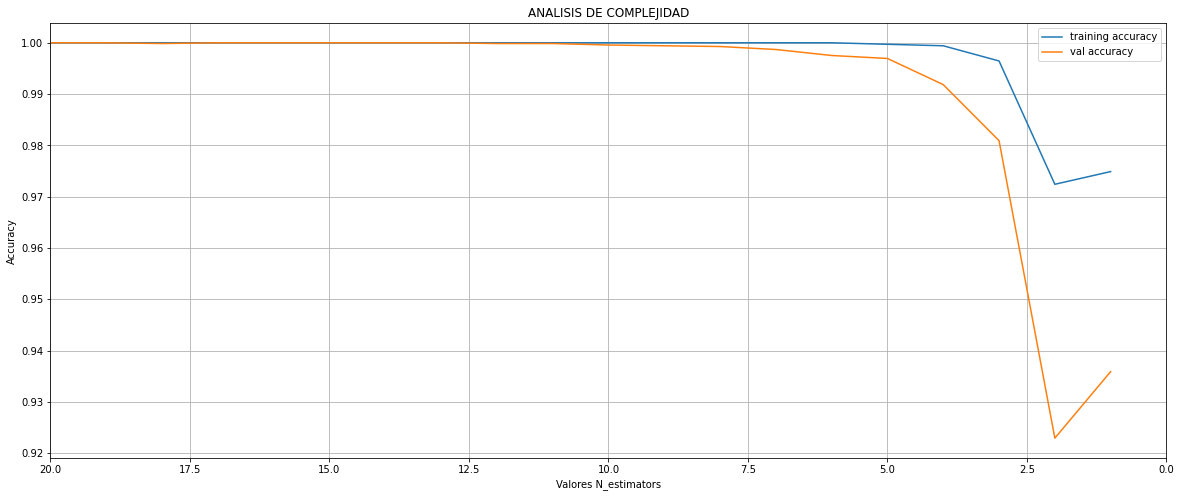

In [27]:
training_accuracy5 = []                    #Lista para guardar los datos de la precision con los datos de entrenamiento
val_accuracy5 = []                         #Lista para guardar los datos de la precision con los datos de validacion

valor_n_estimators =range(20 , 0, -1)                     #Creamos un vector descendente que contiene va de n=20 a n=0

for i in valor_n_estimators:                                                      #Ciclo FOR para realizar el entrenamiento y validacion desde n=20 a n=0
    rnd_clf = RandomForestClassifier(n_estimators=i)                                             #Creamos un objeto que contiene al modelo
    rnd_clf.fit(X_train_standardscaled, Y_train_standardscaled)                                  #Entrenamos el modelo con los datos de entrenamiento
    training_accuracy5.append(rnd_clf.score(X_train_standardscaled, Y_train_standardscaled))     #Medimos y guardamos el desempeño del modelo con los datos de entrenamiento
    val_accuracy5.append(rnd_clf.score(X_val_standardscaled, Y_val_standardscaled))              #Medimos y guardamos el desempeño del modelo con los datos de validacion
    print(i, '-', end='')
# GRAFICAMOS LOS DESEMPEÑOS OBTENIDOS VS LOS VALORES DE N
plt.figure(figsize=(20, 8))
plt.plot(valor_n_estimators, training_accuracy5, label="training accuracy")
plt.plot(valor_n_estimators, val_accuracy5, label="val accuracy")
plt.title("ANALISIS DE COMPLEJIDAD")
plt.ylabel("Accuracy")
plt.xlabel("Valores N_estimators")
plt.xlim(20, 0)
plt.grid()
plt.legend()

In [28]:
#CON UN N_estimators = 10 EL DESEMPEÑO ES EL MEJOR EN VALIDACION
rnd_clf = RandomForestClassifier(n_estimators=10)  
rnd_clf.fit(X_train_standardscaled, Y_train_standardscaled)
print('Desempeño de entrenamiento: ', rnd_clf.score(X_train_standardscaled, Y_train_standardscaled))
print('Desempeño de validacion: ', rnd_clf.score(X_val_standardscaled, Y_val_standardscaled))
print('Desempeño de TEST: ', rnd_clf.score(X_test_pca_standarscaled, Y_test), '\n')

print('Diferencia de los desempeños: ', abs(rnd_clf.score(X_train_standardscaled, Y_train_standardscaled) 
            - rnd_clf.score(X_val_standardscaled, Y_val_standardscaled)))

print('Diferencia de los desempeños: ', abs(rnd_clf.score(X_train_standardscaled, Y_train_standardscaled) 
            - rnd_clf.score(X_test_pca_standarscaled, Y_test)))

Desempeño de entrenamiento:  1.0
Desempeño de validacion:  0.9997086247086248
Desempeño de TEST:  0.6143335192414947 

Diferencia de los desempeños:  0.0002913752913752399
Diferencia de los desempeños:  0.3856664807585053


#**RANDOM FOREST - MINMAX SCALER**

20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 -

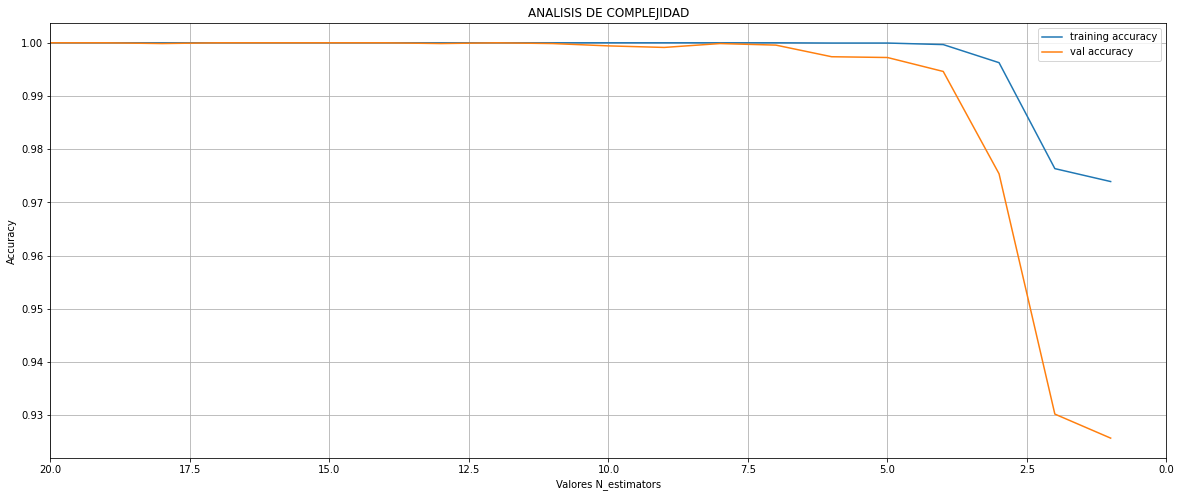

In [29]:
training_accuracy6 = []                    #Lista para guardar los datos de la precision con los datos de entrenamiento
val_accuracy6 = []                         #Lista para guardar los datos de la precision con los datos de validacion

valor_n_estimators2 =range(20 , 0, -1)                     #Creamos un vector descendente que contiene va de n=50 a n=1

for i in valor_n_estimators:                                                      #Ciclo FOR para realizar el entrenamiento y validacion desde alpha=50 a alpha=1
    rnd_clf = RandomForestClassifier(n_estimators=i)                                             #Creamos un objeto que contiene al modelo
    rnd_clf.fit(X_train_minmaxscaler, Y_train_minmaxscaler)                                      #Entrenamos el modelo con los datos de entrenamiento
    training_accuracy6.append(rnd_clf.score(X_train_minmaxscaler, Y_train_minmaxscaler))         #Medimos y guardamos el desempeño del modelo con los datos de entrenamiento
    val_accuracy6.append(rnd_clf.score(X_val_minmaxscaler, Y_val_minmaxscaler))                  #Medimos y guardamos el desempeño del modelo con los datos de validacion
    print(i, '-', end='')
# GRAFICAMOS LOS DESEMPEÑOS OBTENIDOS VS LOS VALORES DE N
plt.figure(figsize=(20, 8))
plt.plot(valor_n_estimators2, training_accuracy6, label="training accuracy")
plt.plot(valor_n_estimators2, val_accuracy6, label="val accuracy")
plt.title("ANALISIS DE COMPLEJIDAD")
plt.ylabel("Accuracy")
plt.xlabel("Valores N_estimators")
plt.xlim(20, 0)
plt.grid()
plt.legend()

In [30]:
#CON UN N_estimators = 12 EL DESEMPEÑO ES EL MEJOR EN VALIDACION
rnd_clf = RandomForestClassifier(n_estimators=12)  
rnd_clf.fit(X_train_minmaxscaler, Y_train_minmaxscaler)
print('Desempeño de entrenamiento: ', rnd_clf.score(X_train_minmaxscaler, Y_train_minmaxscaler))
print('Desempeño de validacion: ', rnd_clf.score(X_val_minmaxscaler, Y_val_minmaxscaler))
print('Desempeño de TEST: ', rnd_clf.score(X_test_pca_minmaxscaled, Y_test), '\n')

print('Diferencia de los desempeños: ', abs(rnd_clf.score(X_train_minmaxscaler, Y_train_minmaxscaler) 
            - rnd_clf.score(X_val_minmaxscaler, Y_val_minmaxscaler)))

print('Diferencia de los desempeños: ', abs(rnd_clf.score(X_train_minmaxscaler, Y_train_minmaxscaler) 
            - rnd_clf.score(X_test_pca_minmaxscaled, Y_test)))

Desempeño de entrenamiento:  1.0
Desempeño de validacion:  0.9997086247086248
Desempeño de TEST:  0.6288343558282209 

Diferencia de los desempeños:  0.0002913752913752399
Diferencia de los desempeños:  0.3711656441717791


# **RED NEURONAL MULTICAPA**

In [31]:
#-------------------------------ASIGNACION DE LOS DATOS: ENTRENAMIENTO Y VALIDACION ----------------
X_train = dataset_train.iloc[:,1:].values
Y_train = dataset_train.iloc[:,0].values

X_train = X_train.reshape(len(X_train), 28, 28)

X_val_test = dataset_test.iloc[:,1:].values
Y_val_test = dataset_test.iloc[:,0].values

X_val_test = X_val_test.reshape(len(X_val_test), 28, 28)

print(X_train.shape)
print(Y_train.shape)

print(X_val_test.shape)
print(Y_val_test.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [32]:
# SEPARACION DEL DATASET PARA VALIDACION Y TEST
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, test_size= 0.25, random_state = 0)      #separacion de datos de entrenamiento y validacion, 
                                                                                                #con 25% para datos de validacion

print(X_val.shape)
print(Y_val.shape)

print(X_test.shape)
print(Y_test.shape)

(5379, 28, 28)
(5379,)
(1793, 28, 28)
(1793,)


In [33]:
#----------------------- NORMALIZAR DATOS
X_train = X_train/255.0 
X_val = X_val/255.0
print(X_train.max())
X_test = X_test/255.0
print('y_valid: ', Y_train.shape)
print('y_train: ', Y_val.shape)

1.0
y_valid:  (27455,)
y_train:  (5379,)


In [34]:
# MODELO DE LA RED CON SUS CAPAS
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(1000,activation="relu"))
model.add(keras.layers.Dense(800,activation="relu"))
model.add(keras.layers.Dense(500,activation="relu"))
model.add(keras.layers.Dense(25,activation="softmax"))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 800)               800800    
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 25)                12525     
                                                                 
Total params: 1,998,825
Trainable params: 1,998,825
Non-trainable params: 0
_________________________________________________________________


In [36]:
l1=1000*784+1000
print(1000*784+1000)
# We can get a model's listo of layers
l2= 800*1000+800
print(800*1000+800)
l3=500*800+500
print(500*800+500)
print(500*25)
l4 = 12500
print(l1+l2+l3+l4)
model.layers

785000
800800
400500
12500
1998800


In [37]:
# fetch a layer by its index
hidden1 = model.layers[1]
# fetch it by name:
hidden1.name
#model.get_layer('dense') is hidden1

'dense'

In [38]:
# PESOS Y BIAS DE LAS NEURONAS
weights, biases = hidden1.get_weights()
print(weights)
print(biases)

[[-0.00292674 -0.01123258  0.04281982 ... -0.03532349  0.03476369
  -0.02716902]
 [-0.04789256  0.05186446 -0.0553684  ...  0.02846148  0.03985201
  -0.04786939]
 [ 0.04078795 -0.04581964 -0.00829733 ... -0.05653811  0.04921719
  -0.03616951]
 ...
 [ 0.0401857   0.033092   -0.02432115 ...  0.02954075 -0.04934675
  -0.00712807]
 [-0.00920612  0.00128526  0.03197191 ...  0.05151002  0.00174023
  -0.05701561]
 [ 0.05426483  0.05026715 -0.04882183 ...  0.05312587  0.01625131
   0.05756525]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [39]:
# After a model is created, call its compile() method to specify the less function and the optimizer to use
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [40]:
# Train the model
history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_val, Y_val))

Epoch 1/50
858/858 [==============================] - 6s 5ms/step - loss: 2.3762 - accuracy: 0.3218 - val_loss: 1.9823 - val_accuracy: 0.3902
Epoch 2/50
858/858 [==============================] - 5s 5ms/step - loss: 1.3889 - accuracy: 0.5764 - val_loss: 1.3604 - val_accuracy: 0.5759
Epoch 3/50
858/858 [==============================] - 4s 5ms/step - loss: 1.0013 - accuracy: 0.6926 - val_loss: 1.1022 - val_accuracy: 0.6563
Epoch 4/50
858/858 [==============================] - 4s 5ms/step - loss: 0.7729 - accuracy: 0.7655 - val_loss: 1.7907 - val_accuracy: 0.4861
Epoch 5/50
858/858 [==============================] - 4s 5ms/step - loss: 0.5994 - accuracy: 0.8207 - val_loss: 1.0047 - val_accuracy: 0.6693
Epoch 6/50
858/858 [==============================] - 4s 5ms/step - loss: 0.4592 - accuracy: 0.8653 - val_loss: 1.0588 - val_accuracy: 0.6572
Epoch 7/50
858/858 [==============================] - 4s 5ms/step - loss: 0.3582 - accuracy: 0.8987 - val_loss: 1.0752 - val_accuracy: 0.6771
Epoch 

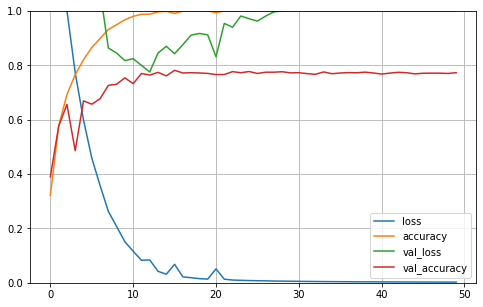

In [41]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [42]:
# VALIDAMOS DESEMPEÑO CON TEST
model.evaluate(X_test, Y_test)

57/57 [==============================] - 0s 3ms/step - loss: 1.0915 - accuracy: 0.7925


[1.0915064811706543, 0.7925264835357666]

# **SIN ESCALAR DATOS (NORMALIZAR = /255)**

In [43]:
print(X_train.shape)
print(Y_train.shape)

print(X_val.shape)
print(Y_val.shape)

print(X_test.shape)
print(Y_test.shape)

(27455, 28, 28)
(27455,)
(5379, 28, 28)
(5379,)
(1793, 28, 28)
(1793,)


In [44]:
X_train2 = X_train.reshape(len(X_train), 784)
X_val2 = X_val.reshape(len(X_val), 784)
X_test2 = X_test.reshape(len(X_test), 784)

print(X_train2.shape)
print(X_val2.shape)
print(X_test2.shape)

(27455, 784)
(5379, 784)
(1793, 784)


In [45]:
#----------------------- NORMALIZAR DATOS
X_train2 = X_train2/255
X_val2 = X_val2/255
X_test2 = X_test2/255

print(X_train2.min())
print(X_train2.max())

print(X_val2.min())
print(X_val2.max())

print(X_test2.min())
print(X_test2.max())

0.0
0.00392156862745098
0.0
0.00392156862745098
0.0
0.00392156862745098


50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 -

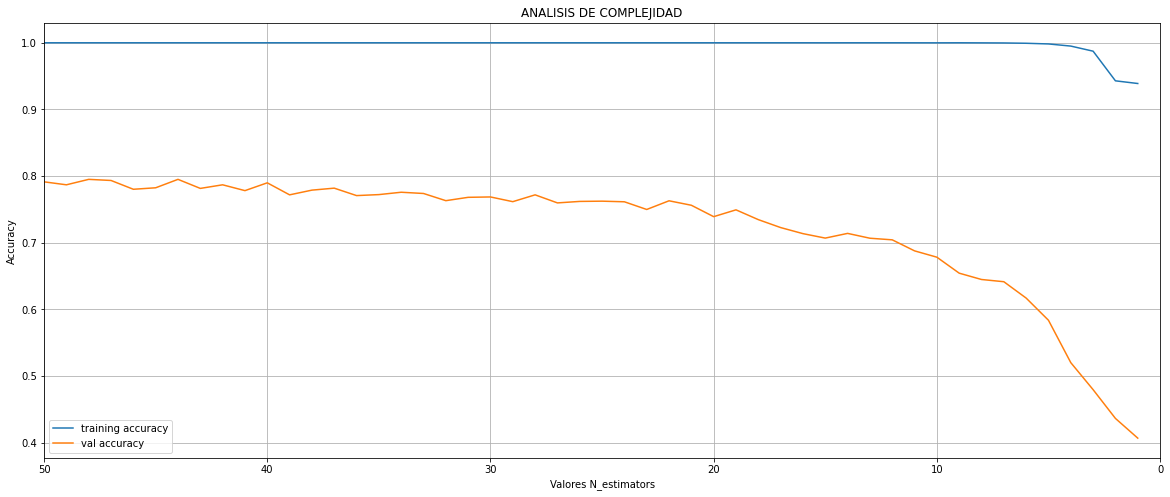

In [46]:
#-----------------RANDOM FOREST --------------------
training_accuracy7 = []                    #Lista para guardar los datos de la precision con los datos de entrenamiento
val_accuracy7 = []                         #Lista para guardar los datos de la precision con los datos de validacion

valor_n_estimators7 =range(50 , 0, -1)                     #Creamos un vector descendente que contiene va de N=50 a N=1

for i in valor_n_estimators7:                                             #Ciclo FOR para realizar el entrenamiento y validacion desde N=50 a N=1
    rnd_clf = RandomForestClassifier(n_estimators=i)                      #Creamos un objeto que contiene al modelo
    rnd_clf.fit(X_train2, Y_train)                                        #Entrenamos el modelo con los datos de entrenamiento
    training_accuracy7.append(rnd_clf.score(X_train2, Y_train))           #Medimos y guardamos el desempeño del modelo con los datos de entrenamiento
    val_accuracy7.append(rnd_clf.score(X_val2, Y_val))                    #Medimos y guardamos el desempeño del modelo con los datos de validacion
    print(i, '-', end='')
# GRAFICAMOS LOS DESEMPEÑOS OBTENIDOS VS LOS VALORES DE N
plt.figure(figsize=(20, 8))
plt.plot(valor_n_estimators7, training_accuracy7, label="training accuracy")
plt.plot(valor_n_estimators7, val_accuracy7, label="val accuracy")
plt.title("ANALISIS DE COMPLEJIDAD")
plt.ylabel("Accuracy")
plt.xlabel("Valores N_estimators")
plt.xlim(50, 0)
plt.grid()
plt.legend()

In [47]:
#CON UN N_estimators = 500 EL DESEMPEÑO ES EL MEJOR EN VALIDACION
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=1)  
rnd_clf.fit(X_train2, Y_train)
print('Desempeño de entrenamiento: ', rnd_clf.score(X_train2, Y_train))
print('Desempeño de validacion: ', rnd_clf.score(X_val2, Y_val))
print('Desempeño de TEST: ', rnd_clf.score(X_test2, Y_test), '\n')

print('Diferencia de los desempeños: ', abs(rnd_clf.score(X_train2, Y_train) 
            - rnd_clf.score(X_val2, Y_val)))

print('Diferencia de los desempeños: ', abs(rnd_clf.score(X_train2, Y_train) 
            - rnd_clf.score(X_test2, Y_test)))

Desempeño de entrenamiento:  1.0
Desempeño de validacion:  0.8254322364751813
Desempeño de TEST:  0.8293363078639152 

Diferencia de los desempeños:  0.17456776352481873
Diferencia de los desempeños:  0.1706636921360848


**CON PCA**

In [48]:
pca2 = PCA(n_components=100, whiten=True, random_state=0).fit(X_train2)
X_pca2_train2 = pca2.transform(X_train2)
X_pca2_val2 = pca2.transform(X_val2)
X_pca2_test2 = pca2.transform(X_test2)

print("X_train2.shape: {}".format(X_train2.shape))
print("X_pca2_train2: {}".format(X_pca2_train2.shape), '\n')

print("X_val2.shape: {}".format(X_val2.shape))
print("X_pca2_val2: {}".format(X_pca2_val2.shape), '\n')

print("X_test2.shape: {}".format(X_test2.shape))
print("X_pca2_test2.shape: {}".format(X_pca2_test2.shape))

X_train2.shape: (27455, 784)
X_pca2_train2: (27455, 100) 

X_val2.shape: (5379, 784)
X_pca2_val2: (5379, 100) 

X_test2.shape: (1793, 784)
X_pca2_test2.shape: (1793, 100)


50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 -

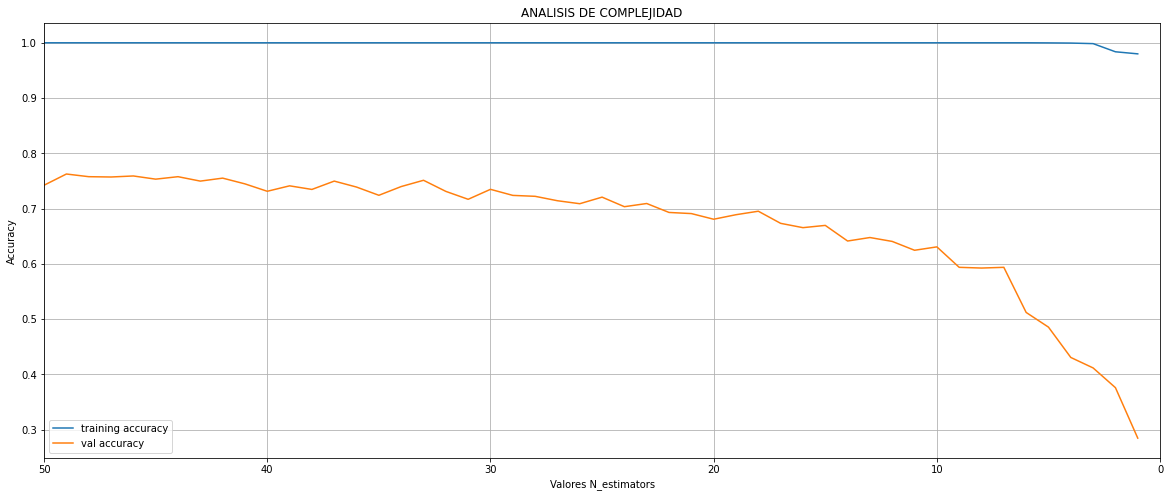

In [49]:
#-----------------RANDOM FOREST --------------------
training_accuracy8 = []                    #Lista para guardar los datos de la precision con los datos de entrenamiento
val_accuracy8 = []                         #Lista para guardar los datos de la precision con los datos de validacion

valor_n_estimators8 =range(50 , 0, -1)                     #Creamos un vector descendente que contiene va de N=50 a N=1

for i in valor_n_estimators8:                                                  #Ciclo FOR para realizar el entrenamiento y validacion desde N=50 a N=1
    rnd_clf = RandomForestClassifier(n_estimators=i)                           #Creamos un objeto que contiene al modelo
    rnd_clf.fit(X_pca2_train2, Y_train)                                        #Entrenamos el modelo con los datos de entrenamiento
    training_accuracy8.append(rnd_clf.score(X_pca2_train2, Y_train))           #Medimos y guardamos el desempeño del modelo con los datos de entrenamiento
    val_accuracy8.append(rnd_clf.score(X_pca2_val2, Y_val))                    #Medimos y guardamos el desempeño del modelo con los datos de validacion
    print(i, '-', end='')
# GRAFICAMOS LOS DESEMPEÑOS OBTENIDOS VS LOS VALORES DE N
plt.figure(figsize=(20, 8))
plt.plot(valor_n_estimators8, training_accuracy8, label="training accuracy")
plt.plot(valor_n_estimators8, val_accuracy8, label="val accuracy")
plt.title("ANALISIS DE COMPLEJIDAD")
plt.ylabel("Accuracy")
plt.xlabel("Valores N_estimators")
plt.xlim(50, 0)
plt.grid()
plt.legend()

In [50]:
#CON UN N_estimators = 300 EL DESEMPEÑO ES EL MEJOR EN VALIDACION
rnd_clf = RandomForestClassifier(n_estimators=300, random_state=1)  
rnd_clf.fit(X_pca2_train2, Y_train)
print('Desempeño de entrenamiento: ', rnd_clf.score(X_pca2_train2, Y_train))
print('Desempeño de validacion: ', rnd_clf.score(X_pca2_val2, Y_val))
print('Desempeño de TEST: ', rnd_clf.score(X_pca2_test2, Y_test), '\n')

print('Diferencia de los desempeños: ', abs(rnd_clf.score(X_pca2_train2, Y_train) 
            - rnd_clf.score(X_pca2_val2, Y_val)))

print('Diferencia de los desempeños: ', abs(rnd_clf.score(X_pca2_train2, Y_train) 
            - rnd_clf.score(X_pca2_test2, Y_test)))

Desempeño de entrenamiento:  1.0
Desempeño de validacion:  0.8224577058932887
Desempeño de TEST:  0.8137200223089793 

Diferencia de los desempeños:  0.1775422941067113
Diferencia de los desempeños:  0.18627997769102067


In [52]:
#CON UN N_estimators = 300 EL DESEMPEÑO ES EL MEJOR EN VALIDACION
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes = 80, random_state=1)  
rnd_clf.fit(X_pca2_train2, Y_train)
print('Desempeño de entrenamiento: ', rnd_clf.score(X_pca2_train2, Y_train))
print('Desempeño de validacion: ', rnd_clf.score(X_pca2_val2, Y_val))
print('Desempeño de TEST: ', rnd_clf.score(X_pca2_test2, Y_test), '\n')

print('Diferencia de los desempeños: ', abs(rnd_clf.score(X_pca2_train2, Y_train) 
            - rnd_clf.score(X_pca2_val2, Y_val)))

print('Diferencia de los desempeños: ', abs(rnd_clf.score(X_pca2_train2, Y_train) 
            - rnd_clf.score(X_pca2_test2, Y_test)))

Desempeño de entrenamiento:  0.9694409032963031
Desempeño de validacion:  0.6644357687302472
Desempeño de TEST:  0.6558839933073062 

Diferencia de los desempeños:  0.3050051345660558
Diferencia de los desempeños:  0.3135569099889969
